In [1]:
# Import our dependencies
# !pip install keras_tuner
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import keras_tuner as kt
import datetime
import shutil
import keras
import ast
import re
import winsound
import json
from numpy.linalg import LinAlgError 


# Use for creating a beeping sound when processing is finished
duration = 1000  # milliseconds
freq = 440  # Hz


#  Import and read the charity_data.csv.
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)
application_df = pd.read_csv("./DataFiles/HR_Analytics.csv")
final_results_all = []
application_df.head()

Using TensorFlow backend


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [2]:
application_df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
application_df[['EmpID', 'EmployeeNumber']].sort_values('EmployeeNumber')

,EmpID,EmployeeNumber
1013,RM001,1
1281,RM002,2
804,RM003,4
520,RM004,5
163,RM005,7
...,...,...
210,RM1468,2064
1304,RM1469,2065
1305,RM1469,2065
655,RM1470,2068


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
application_df.corr()

C:\Users\snbad\AppData\Local\Temp\ipykernel_16976\1123807899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  application_df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.011584,-0.000329,0.205689,NaN,-0.011181,0.011617,0.022704,0.026804,0.509758,-0.005269,0.497486,0.029529,0.300739,0.000864,0.000146,0.053632,NaN,0.038545,0.680837,-0.016819,-0.021704,0.310550,0.213330,0.216755,0.209987
DailyRate,0.011584,1.000000,-0.007134,-0.016750,NaN,-0.054996,0.019176,0.021349,0.043964,0.001940,0.034562,0.005963,-0.028730,0.038991,0.021772,-0.001379,0.012214,NaN,0.042097,0.015036,0.004297,-0.037683,-0.033737,0.010452,-0.032439,-0.022281
DistanceFromHome,-0.000329,-0.007134,1.000000,0.019661,NaN,0.038137,-0.013633,0.027899,0.006427,0.007360,-0.004244,-0.015817,0.025782,-0.028873,0.036682,0.024221,0.002762,NaN,0.045153,0.007802,-0.035882,-0.030581,0.010111,0.018593,0.011817,0.010849
Education,0.205689,-0.016750,0.019661,1.000000,NaN,0.038020,-0.026831,0.019446,0.042908,0.097107,-0.012740,0.092182,-0.026779,0.125433,-0.009984,-0.023366,-0.005762,NaN,0.016717,0.145258,-0.026476,0.008806,0.065983,0.057557,0.051507,0.068713
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.011181,-0.054996,0.038137,0.038020,NaN,1.000000,0.021359,0.030896,-0.007231,-0.016891,-0.051062,-0.013928,0.008998,-0.005340,-0.012501,-0.021808,-0.074316,NaN,0.057548,-0.013731,0.021525,0.009202,-0.010756,-0.008735,-0.011731,-0.009781
EnvironmentSatisfaction,0.011617,0.019176,-0.013633,-0.026831,NaN,0.021359,1.000000,-0.053826,-0.013254,0.000260,-0.010201,-0.006913,0.040251,0.013240,-0.032042,-0.031625,0.009256,NaN,0.002250,-0.002472,-0.016531,0.024867,-0.000318,0.017658,0.013731,0.003072
HourlyRate,0.022704,0.021349,0.027899,0.019446,NaN,0.030896,-0.053826,1.000000,0.046327,-0.028585,-0.070670,-0.015981,-0.018883,0.021169,-0.008834,0.000750,0.000071,NaN,0.049756,-0.004128,-0.010846,-0.004835,-0.018848,-0.023756,-0.026131,-0.003166
JobInvolvement,0.026804,0.043964,0.006427,0.042908,NaN,-0.007231,-0.013254,0.046327,1.000000,-0.013770,-0.018036,-0.017496,-0.019553,0.015537,-0.014514,-0.025382,0.032878,NaN,0.022028,-0.007114,-0.018256,-0.008954,-0.022974,0.005862,-0.025929,0.037990
JobLevel,0.509758,0.001940,0.007360,0.097107,NaN,-0.016891,0.000260,-0.028585,-0.013770,1.000000,-0.001440,0.949835,0.039256,0.142472,-0.036669,-0.021588,0.018063,NaN,0.015803,0.781880,-0.017370,0.038027,0.535210,0.390189,0.355518,0.371987


In [6]:
#application_df.corr().to_csv('./DataFiles/hr_analysis_correlation.csv', index=False)

# Define Functions

In [7]:
# Delete old dirctory used by keras_tuner.Hyperband before a new keras_tuner.Hyperbad is made
def delete_directory_and_its_content(directory_name):

    # Use shutil.rmtree() to recursively delete directories and subdirectories
    try:
        shutil.rmtree(directory_name)
        print(f"Directory '{directory_name}' has been deleted successfully.")
    except OSError as e:
        print(f"Error: {e}")

In [8]:
# Creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()


    # number of layers including input layer but excluding output layer
    num_layers = hp.Int('num_layers', 1, 6)

    activation = hp.Choice('activation_layer_input', ['relu', 'tanh', 'leaky_relu'])

    #  Allow kerastuner to decide which activation function to use in hidden layers
    if activation == 'relu':
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('neurons_layer_input', min_value=X.shape[1], max_value=round(X.shape[1] * 2), step=5), activation='relu', input_dim=X.shape[1]))
    elif activation == 'tanh':
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('neurons_layer_input', min_value=X.shape[1], max_value=round(X.shape[1] * 2), step=5), activation='tanh', input_dim=X.shape[1]))
    elif activation == 'leaky_relu':
        activation = tf.keras.layers.LeakyReLU(alpha=0.01)
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('neurons_layer_input', min_value=X.shape[1], max_value=round(X.shape[1] * 2), step=5), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_dim=X.shape[1]))


    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(1, num_layers):

        activation = hp.Choice(f'activation_layer_{i}', ['relu', 'leaky_relu'])

        #  Allow kerastuner to decide which activation function to use in hidden layers
        if activation == 'leaky_relu':
            activation = tf.keras.layers.LeakyReLU(alpha=0.01)
        nn_model.add(tf.keras.layers.Dense(units=hp.Int(f'neurons_layer_{i}',
            min_value=2,
            max_value=round(X.shape[1] * 2),
            step=1),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # hp.Choice('random_seed2', [str(np.random.get_state())])
    # Compile the model
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    nn_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr), metrics = ["accuracy"])#optimizer='adam', metrics=["accuracy"])

    return nn_model

In [9]:
# Function to otherize values from multiple columns
def otherizations(df, list_of_columns_to_otherize, list_of_list_of_values_to_replace):
    for index in range(len(list_of_columns_to_otherize)):
        df = otherize_column(df, list_of_columns_to_otherize[index], list_of_list_of_values_to_replace[index])

    return df

In [10]:

# Function to change value of column to "other" (typically used for rare values)
def otherize_column(df, column, list_of_values_to_replace):
    df_copy = df.copy()


    # Replace in dataframe
    for app in list_of_values_to_replace:
        df_copy[column] = df_copy[column].replace(app,"Other")

    # Check to make sure binning was successful
    # print(df_copy[column].value_counts())

    return df_copy

In [11]:
# Remove outliers from a given column when a value's z-score for that column is greater than a given limit
def remove_outliers(df, threshold, columns_to_remove_outliers_from):
    print(columns_to_remove_outliers_from)
    print(type(columns_to_remove_outliers_from))
    # Calculate Z-scores only for specified columns
    z_scores = np.abs(stats.zscore(df[columns_to_remove_outliers_from]))

    # Create a mask for outliers
    outliers = (z_scores > threshold)

    # Create a DataFrame with outliers for further inspection if needed
    outlier_rows = df[df.index.isin(df[columns_to_remove_outliers_from].index[outliers.any(axis=1)])]

    # Remove rows with outliers in the specified columns
    df_cleaned = df[~df.index.isin(df[columns_to_remove_outliers_from].index[outliers.any(axis=1)])]

    print("Outlier rows:")
    print(outlier_rows.index)
    
    return outlier_rows, df_cleaned

In [12]:
# Remove outliers using the 1.5 InterQuartile Range Rule as the cuttoff values
def remove_outliers_1_5_IQR_Rule(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
    
        # Filter out rows outside of the IQR for this column
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

    return df

In [13]:
# Extract X and y from the given dataframe
def extract_X_y(df, y_column_name):
    # Split our preprocessed data into our features and target arrays
    # print(a2pplication_df.columns)
    X = df.drop(columns=[y_column_name])
    y = df[y_column_name]
    return (X, y)

In [14]:
# Create a specific model instead of rely on keras_tuner.hyperband
def create_specific_model(list_of_activations, num_layers, list_of_number_of_nodes_hidden_layer, input_dim, output_activation, filepath_to_model_weights):

    nn = tf.keras.models.Sequential()

    for layer_number in range(0, num_layers):
        if list_of_activations[layer_number] == 'leaky_relu':
            activation = tf.keras.layers.LeakyReLU(alpha=0.01)
        else:
            activation = list_of_activations[layer_number]
        if layer_number == 0:
            # Input layer which requires input_dim
            nn.add(tf.keras.layers.Dense(units = list_of_number_of_nodes_hidden_layer[layer_number], activation = activation, input_dim = input_dim))
        else:
            nn.add(tf.keras.layers.Dense(units = list_of_number_of_nodes_hidden_layer[layer_number], activation = activation))


    # Output layer
    nn.add(tf.keras.layers.Dense(units = 1, activation = output_activation))
    
    if (filepath_to_model_weights != ''):
        nn.load_weights(filepath_to_model_weights)

    # Check the structure of the model
    print(nn.summary())
    return nn

In [15]:
# Find and return X_train_scaled and X_test_scaled
def scale_it(X_train, X_test):
    # Create a StandardScaler instances
    scaler = StandardScaler()

    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)

    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [16]:
# Expose Random Seed of Tensorflow
class RandomSeedLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # Access the TensorFlow random seed and log it
        random_seed = tf.random.get_seed()
        print(f"Random Seed: {random_seed}")

# Create an instance of the custom callback
random_seed_logger = RandomSeedLogger()

In [17]:
# Otherize not value explicitly but by knowing the ordinal popularity of the value (e.g. '11' for 11th most common value)
def otherizer2(df, column, starting_from_least_column):
    to_replace = [df[column].value_counts().index[starting_from_least_column:]]
    # print(f'len(df[column].value_counts().index): {len(df[column].value_counts().index.tolist())}')
    print(f'len(to_replace): {len(to_replace[0].tolist())}')
    # print(f'to_replace: {to_replace}')
    # Replace in dataframe
    for cls in to_replace:
        df[column] = df[column].replace(cls,"Other")

    # print(f'len(df[column].value_counts().index): {len(df[column].value_counts().index.tolist())}')
    return df

In [18]:
# Optimization by otherizing across a range of values
def optimization2(optimization_title, df, columns, start, finish, step, reset_df):
    if reset_df:
        df = application_df.drop(columns=['EIN', 'NAME'])
    for column in columns:
        if len(df[column].value_counts()) > 5:
            print(f'start: {start}')
            for starting_from_least_column in range(start, finish, step):
                if reset_df:
                    df = application_df.drop(columns=['EIN', 'NAME'])

                print(f'start: {start}')
                print(f'starting_from_least_column: {starting_from_least_column}')
                print(f'len(df[column].value_counts().index): {len(df[column].value_counts().index.tolist())}')
                df = otherizer2(df, column, starting_from_least_column)
                print(f'len(df[column].value_counts().index): {len(df[column].value_counts().index.tolist())}')
                run_hyperparameters(optimization_title + f': otherize columns from {starting_from_least_column}', df, 8, 9, '', 20)

In [19]:
# Return the last n lines of a file
def read_last_n_lines(file_name, n):
    
    with open(file_name, 'r') as file:
        lines = file.readlines()
        return lines[-n:]

In [20]:
# Inserts a newline character every interval (to breakup long strings)
def insert_newlines(string, interval):
    return '\n'.join(string[i:i+interval] for i in range(0, len(string), interval))

In [21]:
# def insert_newlines(string, interval):
#     chunks = []
#     last_index = 0

#     while last_index < len(string):
#         # Determine the next slice
#         next_index = min(last_index + interval, len(string))
#         chunk = string[last_index:next_index]

#         # Look for the last comma in the last 59 characters of the chunk
#         last_comma = chunk.rfind(", '", max(0, interval - 59))
#         if last_comma != -1 and next_index < len(string):
#             # Replace the last comma with ",\n"
#             chunk = chunk[:last_comma] + ",\n'" + chunk[last_comma+2:]

#             # Update the next_index to reflect the newline insertion
#             next_index = last_index + last_comma + 2

#         chunks.append(chunk)
#         last_index = next_index

#     return ''.join(chunks)

In [22]:
def get_test_data_without_removing_outliers(df, df_used_to_make_model, remove_columns):
    df_new = df.copy()

    # These columns to be removed BEFORE pd.get_dummies()
    if remove_columns in df_new.columns:
        df_new_removed_column = df_new.drop(columns=[remove_columns])
    else:
        df_new_removed_column = df_new


    df_new_removed_column = pd.get_dummies(df_new_removed_column)

    # In order to use the same model the number of columns has to match AFTER creating columns from
    # using the pd.get_dummies() method but before finding the X and y
    absent_columns = list(set(df_new_removed_column.columns) - set(df_used_to_make_model.columns))
    if len(absent_columns) > 0:
        df_new_removed_column = df_new_removed_column.drop(columns=absent_columns)
    
    



    # Split our preprocessed data into our features and target array
    X, y = extract_X_y(df_new_removed_column, 'Attrition')




    file_path_shape = "./DataFiles/shape_details.txt"

    # Open the file in append mode
    with open(file_path_shape, "a") as file:
        file.write('in get_test_data_without_removing_outliers()\n' + str(X.shape) + '\n' + str(y.shape) + '\n')


    # Split the preprocessed data into a training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        random_state=4,
                                                        stratify=y)
    
    
    # pd.set_option('display.max_columns', None)
    # pd.set_option('display.max_rows', None)
    # print(f'absent_columns: {absent_columns}')
    # print('@@@@@@@@@@@@@@@@@@@')
    # print(f'df.shape: {df.shape}')
    # print(f'df.columns: {df.columns}')
    # # print(f'df_used_to_make_model.shape: {df_used_to_make_model.shape}')
    # # print(f'df_used_to_make_model.columns: {df_used_to_make_model.columns}')
    # # print(f'df_new_removed_column.shape: {df_used_to_make_model.shape}')
    # # print(f'df_new_removed_column.columns: {df_used_to_make_model.columns}')
    # print('&&&&&&&&&&&&&&')
    # print(f'remove_columns: {remove_columns}')
    # print(f'X_train.shape: {X_train.shape}')
    # print(f'X_train.columns: {X_train.columns}')
    # print(f'X_test.shape: {X_test.shape}')
    # print(f'X_test.columns: {X_test.columns}')
    # print("$$$$$$$$$$$$$$$$")


    # Standardize X_train and X_test
    X_train_scaled, X_test_scaled = scale_it(X_train, X_test)
    # print(f'X_test_scaled.shape: {X_test_scaled.shape}')
    # # print(f'X_test_scaled.columns: {X_test_scaled.columns}')
    # print(f'y_test.shape: {y_test.shape}')
    # print('!!!!!!!!!!!!!!!!')
    # # print(f'y_test.columns: {y_test.columns}')
    return X_test_scaled, y_test

In [23]:
def create_nice_string(dict_stuffs):
    formatted_output = ""
    for key, value in dict_stuffs.items():
        if isinstance(value, dict):  # For nested dictionaries, convert them to string without newlines
            value_str = json.dumps(value)
        else:
            value_str = str(value)
        formatted_output += f"'{key}': {value_str}\n"
    return '{' + formatted_output + '}\n'

In [24]:
# Create hyperband models for multiple z-score thresholds
def run_hyperparameters(optimization_title, df_with_preprocessing, df_without_some_preprocessing_for_test_data, columns_to_remove_outliers_from, begin_threshold, end_threshold, column_to_remove, max_epochs, restrict_columns_to_interquartile, use_equal_number_outliers_as_signal_to_bypass_z_score_threshold_analysis, run_model_against_X_test_scaled_with_outliers):
    # X must be global for create_model to receive X
    global X#, y, final_results_all, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled

    if column_to_remove in df_with_preprocessing.columns:
        df_new_removed_column = df_with_preprocessing.drop(columns=[column_to_remove])
    else:
        df_new_removed_column = df_with_preprocessing



    # Set option to display all rows
    pd.set_option('display.max_rows', None)

    df_new_removed_column = pd.get_dummies(df_new_removed_column)
    # return df_new_removed_column
    # print('number of columns', len(df_new_removed_column.columns))
    # return
    for z_threshold in range(begin_threshold, end_threshold):

        np.random.seed(42)
        tf.random.set_seed(42)
        number_of_rows_before_outliers_removed = df_new_removed_column.shape[0]

        if restrict_columns_to_interquartile:
            no_outliers_df = remove_outliers_1_5_IQR_Rule(df_new_removed_column)
        else:
            outlier_rows, no_outliers_df = remove_outliers(df_new_removed_column, z_threshold, columns_to_remove_outliers_from)

        number_of_outlier_rows = number_of_rows_before_outliers_removed - no_outliers_df.shape[0]
        

        file_path = "./DataFiles/optimization_results.txt"
        past_results_records = read_last_n_lines(file_path, 8)
        prev_number_of_outlier_rows = re.search("'number of outlier rows': (\d+)", past_results_records[1]).group(1)
        print(prev_number_of_outlier_rows)
        if use_equal_number_outliers_as_signal_to_bypass_z_score_threshold_analysis:
            if int(prev_number_of_outlier_rows) == number_of_outlier_rows:
                # Skip to the next threshold
                continue
        #     pass
        # print('number of columns', len(df_new_removed_column.columns))
        # return

        # Split our preprocessed data into our features and target array
        X, y = extract_X_y(no_outliers_df, 'Attrition')

        

        file_path_shape = "./DataFiles/shape_details.txt"

        # Open the file in append mode
        with open(file_path_shape, "a") as file:
            file.write('in hyperparameters()\n' + str(X.shape) + '\n' + str(y.shape) + '\n')

        # Split the preprocessed data into a training and testing dataset
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            random_state=3,
                                                            stratify=y)

        # Standardize X_train and X_test
        X_train_scaled, X_test_scaled = scale_it(X_train, X_test)

        delete_directory_and_its_content('./untitled_project/')


        
        tuner = kt.Hyperband(
            create_model,
            objective="val_accuracy",
            max_epochs=max_epochs,
            hyperband_iterations=2,
            seed=1)
        
        # Run the kerastuner search for best hyperparameters
        tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
        first_model = tuner.get_best_models(num_models=1)[0]


        # First evaluate WITHOUT outliers in test data
        model_loss, model_accuracy_WITHOUT_outliers_in_test_data = first_model.evaluate(X_test_scaled,y_test,verbose=2)


        timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        first_model.save_weights(f'./DataFiles/model_weights_{timestamp}_{float(model_accuracy_WITHOUT_outliers_in_test_data*100):.2f}.h5')

        dict_results = {}
        dict_results['model_accuracy_WITHOUT_outliers_in_test_data'] = model_accuracy_WITHOUT_outliers_in_test_data


        # Get test data WITH outliers still present but note that b/c the same model from above will be used the columns will have to match
        # in the df that is sent
        X_test_scaled_WITH_outliers, y_test_WITH_outliers = get_test_data_without_removing_outliers(df_without_some_preprocessing_for_test_data, no_outliers_df, column_to_remove)

        # Second evaluate WITH outliers in test data
        
        # pd.set_option('display.max_columns', None)
        # pd.set_option('display.max_rows', None)

        # print('**********************')
        # print(f'X_test_scaled.shape: {X_test_scaled.shape}')
        # print(f'y_test.shape: {y_test.shape}')
        # print(f'X_test_scaled_WITH_outliers.shape: {X_test_scaled_WITH_outliers.shape}')
        # print(f'y_test_WITH_outliers.shape: {y_test_WITH_outliers.shape}')
        # print(f'X_test.columns: {X_test.columns}')
        # print(f'y_test.columns: {y_test.name}')
        # # print(f'X_test_scaled_WITH_outliers.columns: {X_test_scaled_WITH_outliers.columns}')
        # print(f'y_test_WITH_outliers.columns: {y_test_WITH_outliers.name}')
        dict_results['timestamp'] = timestamp
        dict_results['z_threshold'] = z_threshold
        dict_results['columns to remove outliers from'] = columns_to_remove_outliers_from
        if run_model_against_X_test_scaled_with_outliers:
            model_loss, model_accuracy_WITH_outliers_in_test_data = first_model.evaluate(X_test_scaled_WITH_outliers,y_test_WITH_outliers,verbose=2)
            dict_results['model_accuracy_WITH_outliers_in_test_data'] = model_accuracy_WITH_outliers_in_test_data
        else:
            dict_results['model_accuracy_WITH_outliers_in_test_data'] = 'did not run with outliers included'
        
        dict_results['number of columns'] = len(df_new_removed_column.columns)
        dict_results['param'] = tuner.get_best_hyperparameters(1)[0].values
        dict_results['columns'] = df_new_removed_column.columns
        dict_results['removed column'] = column_to_remove
        dict_results['restrict columns to 1.5 * IQR'] = restrict_columns_to_interquartile
        dict_results['number of outlier rows'] = number_of_outlier_rows
        dict_results['number of rows'] = no_outliers_df.shape[0]
        dict_results['max_epoch'] = max_epochs
        dict_results['hyperband seed'] = 1
        dict_results['np.rand.seed and tf.random.set_seed'] = 42
        dict_results['Optimization Title'] = optimization_title
        final_results_all.append(dict_results)

        file_path = "./DataFiles/optimization_results.txt"

        # Open the file in append mode
        with open(file_path, "a") as file:
            # Append a line to the file
            # line_to_append = "This is a new line to append to the file."
            # string_with_newlines = str(dict_results).replace("'Optimization Title'", "\n'Opitimization Title'")
            # string_with_newlines = string_with_newlines.replace("'param'", "\n'param'")
            file.write(create_nice_string(dict_results))#string_with_newlines + "\n")
    


    # Set option to display all rows
    pd.set_option('display.max_rows', 60)
    print(final_results_all[(-1 * (end_threshold - begin_threshold)):])

In [25]:
# Bucket all 'column' values that had an average Attrition value between min and max inclusively
def bucket_by_Attrition_Average(df, min, max, column, replacement_value):
    df1 = df.copy()

    print(f"Number of unique values in '{column}' are: {len(df1[column].value_counts())}")
    print(df1[column].value_counts())

    groupby_df = df1[[column, 'Attrition']].groupby(column).mean().sort_values('Attrition')

    bucket = groupby_df[(groupby_df['Attrition'] >= min) & (groupby_df['Attrition'] <= max)].index.tolist()    
    print(f"\nBucket '{replacement_value}' includes the values: {bucket}\n")
    # Replace in dataframe
    for cls in bucket:
        df1[column] = df1[column].replace(cls, replacement_value)

    # Check to make sure binning was successful
    print(f"Number of unique values in '{column}' are: {len(df1[column].value_counts())}")
    print(df1[column].value_counts())

    return df1

# Preprocessing: Remove Duplicate Rows

In [26]:
print(f'dataframe shape before duplicate removal: {application_df.shape}')
duplicates_removed_df = application_df.drop_duplicates()
print(f'dataframe shape after duplicate removal: {duplicates_removed_df.shape}')

dataframe shape before duplicate removal: (1480, 38)
dataframe shape after duplicate removal: (1473, 38)


# Preprocessing: Remove Duplicate EmpID Rows

In [27]:

print(f'dataframe shape after duplicate removal: {duplicates_removed_df.shape}')

# Create a dictionary with column names and their unique value counts
unique_counts = {col:duplicates_removed_df[col].nunique() for col in duplicates_removed_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)

dataframe shape after duplicate removal: (1473, 38)
                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10             EmployeeCount              1
11            EmployeeNumber           1470
12   EnvironmentSatisfaction              4
13                    Gender              2
14                HourlyRate             71
15            JobInvolvement              4
16                  JobLevel              5
17                   JobRole              9
18           JobSatisfaction              4
19             MaritalStatus              3
20             MonthlyIn

### Note
Because the shape shows there are 1473 rows and there are only 1470 unique EmpIDs, that means there are 3 rows with duplicate EmpIDs. And after a search in excel the following show the duplicate EmpIDs. Only one row for each duplicate EmpID will be kept, the other removed. The criteria for removal will be the row with the smaller value in the 'YearsWithCurrManager' column will be removed (presuming that the row with more years is more up-to-date than the row with fewer years).

In [28]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1465']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,5.0


In [29]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1466']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
802,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,Upto 5k,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3.0
803,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,Upto 5k,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,2.0


In [30]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1467']


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
953,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,5k-10k,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7.0
955,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,5k-10k,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,1.0


In [31]:
print(f'Shape of dataframe before removing duplicate EmpID rows: {duplicates_removed_df.shape}')

duplicates_EmpID_removed_df = duplicates_removed_df.loc[~duplicates_removed_df.index.isin([161, 803, 955])]

print(f'Shape of dataframe after removing duplicate EmpID rows: {duplicates_EmpID_removed_df.shape}')


Shape of dataframe before removing duplicate EmpID rows: (1473, 38)
Shape of dataframe after removing duplicate EmpID rows: (1470, 38)


# Preprocessing: Convert Attrition to '1's and '0's

In [32]:
attrition1And0_df = duplicates_EmpID_removed_df.copy()

attrition1And0_df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
print(attrition1And0_df.shape)
print(attrition1And0_df.info())
attrition1And0_df.head()

(1470, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   object 
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeCount             1470 non-null   int64  
 11  EmployeeNumber            1470 non-null   int64  
 12  EnvironmentSatisfaction   1470 non-null   int64  
 13  Gender                    1470 non-null   object 
 1

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [34]:
attrition1And0_df['Attrition'] = attrition1And0_df['Attrition'].replace('No',"0")
attrition1And0_df['Attrition'] = attrition1And0_df['Attrition'].replace('Yes',"1")
attrition1And0_df['Attrition'] = attrition1And0_df['Attrition'].astype('int64')
print(attrition1And0_df.shape)
print(attrition1And0_df.info())
attrition1And0_df.head()

(1470, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   int64  
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeCount             1470 non-null   int64  
 11  EmployeeNumber            1470 non-null   int64  
 12  EnvironmentSatisfaction   1470 non-null   int64  
 13  Gender                    1470 non-null   object 
 1

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [35]:
attrition1And0_df.corr()

C:\Users\snbad\AppData\Local\Temp\ipykernel_16976\1342716093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition1And0_df.corr()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.210199
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.162628
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.022880
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.013031
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.068360
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.007140
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,0.005164
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.006402
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.038817


In [36]:
attrition1And0_df.corr().to_csv('./DataFiles/hr_analysis_correlation_after_scaling_Attrition.csv', index=False)

C:\Users\snbad\AppData\Local\Temp\ipykernel_16976\1964535484.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition1And0_df.corr().to_csv('./DataFiles/hr_analysis_correlation_after_scaling_Attrition.csv', index=False)


In [37]:
filepath = './DataFiles/hr_analysis_after_scaling_Attrition.csv'
attrition1And0_df.to_csv(filepath, index = False)

In [38]:
filepath = './DataFiles/hr_analysis_after_scaling_Attrition.csv'
attrition1And0_df = pd.read_csv(filepath)
attrition1And0_df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,RM412,60,55+,0,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10.0
1466,RM428,60,55+,0,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11.0
1467,RM537,60,55+,0,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2.0
1468,RM880,60,55+,0,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9.0


# Preprocessing: Remove Columns With Only Single Value

In [39]:
removed_singlets_df = attrition1And0_df.copy()
# Create a dictionary with column names and their unique value counts
unique_counts = {col:application_df[col].nunique() for col in removed_singlets_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)


                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10             EmployeeCount              1
11            EmployeeNumber           1470
12   EnvironmentSatisfaction              4
13                    Gender              2
14                HourlyRate             71
15            JobInvolvement              4
16                  JobLevel              5
17                   JobRole              9
18           JobSatisfaction              4
19             MaritalStatus              3
20             MonthlyIncome           1349
21                SalarySlab    

In [40]:
print(removed_singlets_df.shape)

(1470, 38)


In [41]:
# Drop columns with only one value

# Identify columns with only one unique value
cols_to_drop = [col for col in removed_singlets_df.columns if removed_singlets_df[col].nunique() == 1]

# Drop these columns from the DataFrame
removed_singlets_df.drop(cols_to_drop, axis=1, inplace=True)
print(removed_singlets_df.columns)
removed_singlets_df.shape


Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


(1470, 35)

# Preprocessing: Remove ID Columns

In [42]:
# Remove id column
print(removed_singlets_df.shape)
remove_id_df = removed_singlets_df.copy()
remove_id_df.drop(['EmpID'], axis=1, inplace=True)
remove_id_df.shape

(1470, 35)


(1470, 34)

In [43]:
# Remove id column
remove_id_df.drop(['EmployeeNumber'], axis=1, inplace=True)
remove_id_df.shape

(1470, 33)

# Calculate R-Squared

In [44]:
df_processed = remove_id_df.copy()
df_processed = pd.get_dummies(df_processed)
dependent_attrition_column = df_processed['Attrition']
list_r_squared = []
# print(df_processed.columns)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for column in df_processed.columns:
    # print(column)
    if column == 'Attrition':
        continue
    independent_column = df_processed[column]
    try:
        coeficients = np.polyfit(independent_column, dependent_attrition_column, 1)
        predicted_vals = np.polyval(coeficients, independent_column)

        predicted_v_actual_diff = dependent_attrition_column - predicted_vals
        ss_delta = np.sum(predicted_v_actual_diff**2)
        ss_total = np.sum((dependent_attrition_column - np.mean(dependent_attrition_column))**2)
        r_squared = 1 - (ss_delta / ss_total)
        list_r_squared.append([column, r_squared])
    except LinAlgError:
        pass                              

        
file_path_r_squared = "./DataFiles/r_squared_results.txt"

# Open the file in append mode
with open(file_path_r_squared, "a") as file:
    file.write(str(sorted(list_r_squared, key=lambda x: x[1], reverse=True)).replace('], ', '],\n') + "\n")
sorted(list_r_squared, key=lambda x: x[1], reverse=True)

[['OverTime_Yes', 0.060574067091577755],
 ['OverTime_No', 0.060574067091577644],
 ['MaritalStatus_Single', 0.03077166895035066],
 ['TotalWorkingYears', 0.02926263417866337],
 ['JobLevel', 0.028596416787444734],
 ['AgeGroup_18-25', 0.026072449697484235],
 ['YearsInCurrentRole', 0.02577469839531632],
 ['MonthlyIncome', 0.025548692097007608],
 ['Age', 0.025346234211133023],
 ['JobRole_Sales Representative', 0.024722615698531736],
 ['SalarySlab_Upto 5k', 0.024435021950219182],
 ['StockOptionLevel', 0.018808728789228457],
 ['YearsAtCompany', 0.018061267181127882],
 ['JobInvolvement', 0.016904149018993175],
 ['AgeGroup_36-45', 0.016608140510848024],
 ['BusinessTravel_Travel_Frequently', 0.013257856457362327],
 ['SalarySlab_15k+', 0.011243325034004048],
 ['JobSatisfaction', 0.010708343452512814],
 ['EnvironmentSatisfaction', 0.010685145682628905],
 ['JobRole_Laboratory Technician', 0.009661019531884474],
 ['MaritalStatus_Married', 0.008278024787008453],
 ['JobRole_Research Director', 0.007897

In [55]:
r_graph = sorted(list_r_squared, key=lambda x: x[1], reverse=True)
top_r = r_graph[:10]
top_r

[['OverTime_Yes', 0.060574067091577755],
 ['OverTime_No', 0.060574067091577644],
 ['MaritalStatus_Single', 0.03077166895035066],
 ['TotalWorkingYears', 0.02926263417866337],
 ['JobLevel', 0.028596416787444734],
 ['AgeGroup_18-25', 0.026072449697484235],
 ['YearsInCurrentRole', 0.02577469839531632],
 ['MonthlyIncome', 0.025548692097007608],
 ['Age', 0.025346234211133023],
 ['JobRole_Sales Representative', 0.024722615698531736]]

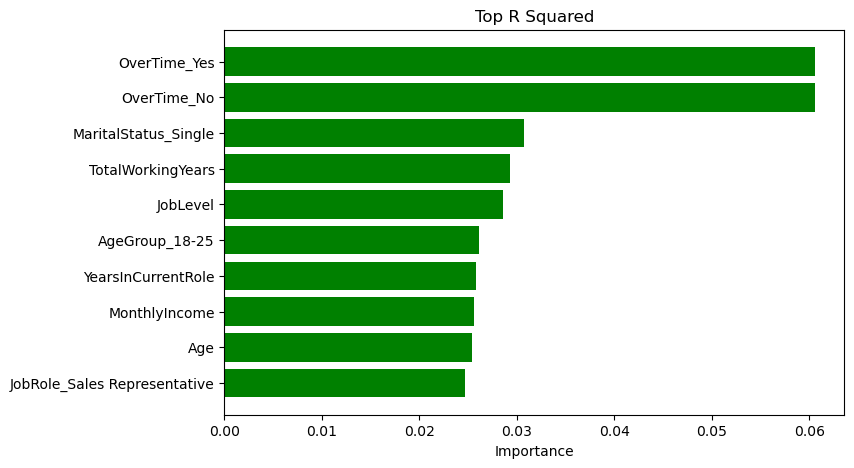

In [57]:
#Plot Z_scores
data = top_r

# Separate labels and values
labels, values = zip(*data)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(labels, values, color='green')
plt.xlabel('Importance')
plt.title('Top R Squared')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()